In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
df=pd.read_csv(r"C:\Users\varungo\Desktop\daily-total-female-births-CA.csv")

In [178]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [179]:
df.dtypes

date      object
births     int64
dtype: object

In [180]:
df["date"]=pd.to_datetime(df['date'])

In [181]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [182]:
df.shape

(365, 2)

In [183]:
df.isnull().sum()

date      0
births    0
dtype: int64

In [184]:
df=df.set_index("date")


In [185]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["births"].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


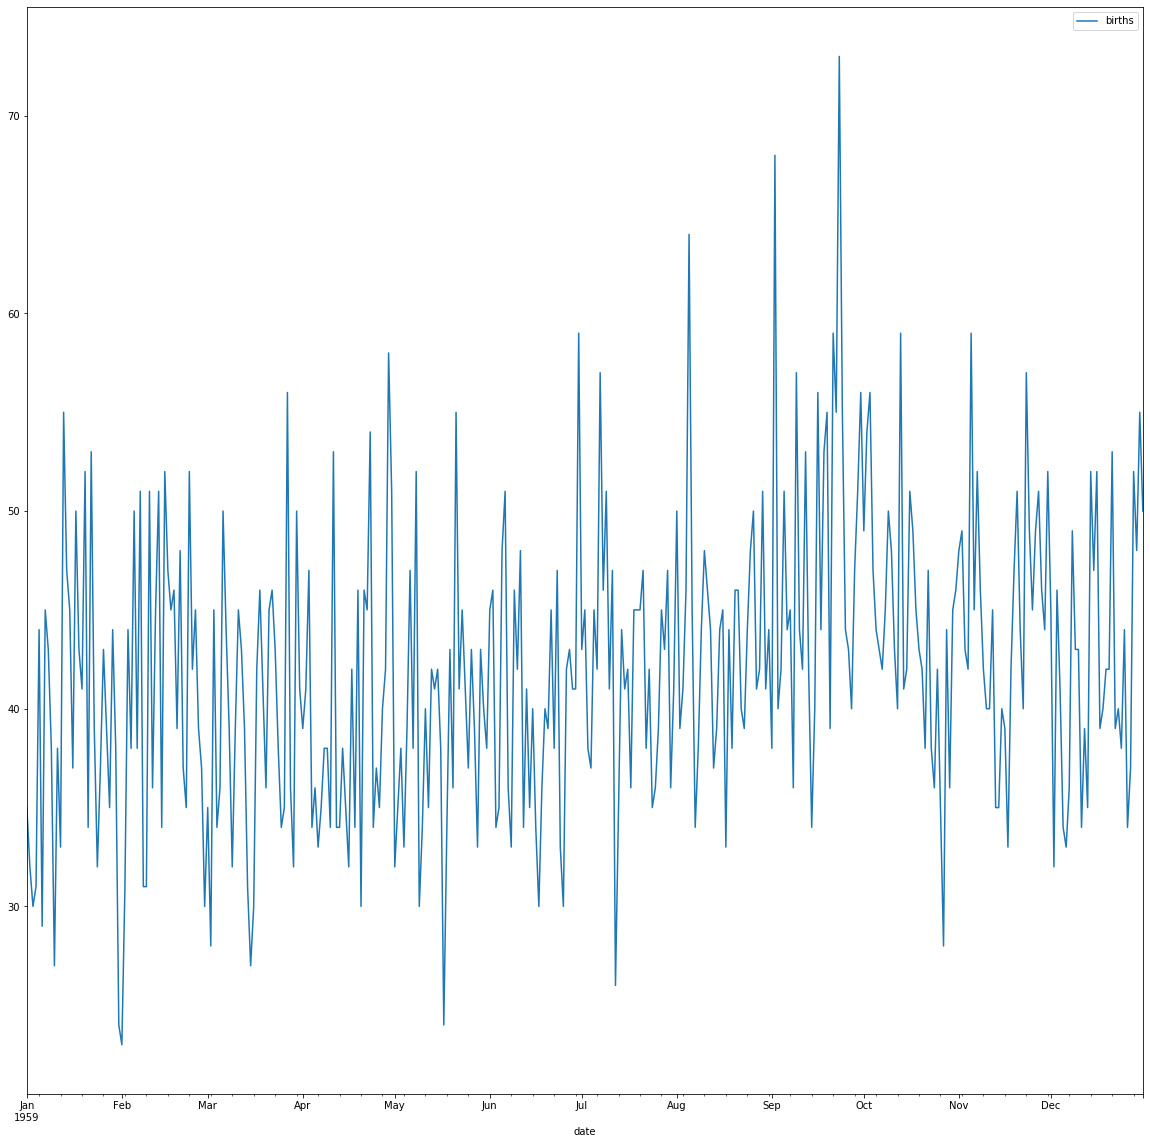

In [186]:
df.plot(figsize=(20,20))

In [168]:
df["births"]=df["births"]-df["births"].shift(10)
df.dropna()

,births
date,
1959-01-11,3.0
1959-01-12,1.0
1959-01-13,25.0
1959-01-14,16.0
1959-01-15,1.0
...,...
1959-12-27,-2.0
1959-12-28,12.0
1959-12-29,6.0


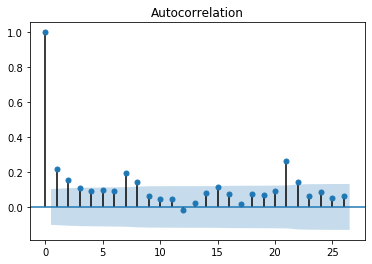

In [187]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
plot_acf(df["births"])
pyplot.show()

<Figure size 1440x1440 with 0 Axes>

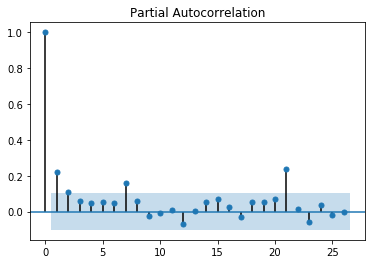

In [188]:
plt.figure(figsize=(20,20))
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
plot_pacf(df)
pyplot.show()

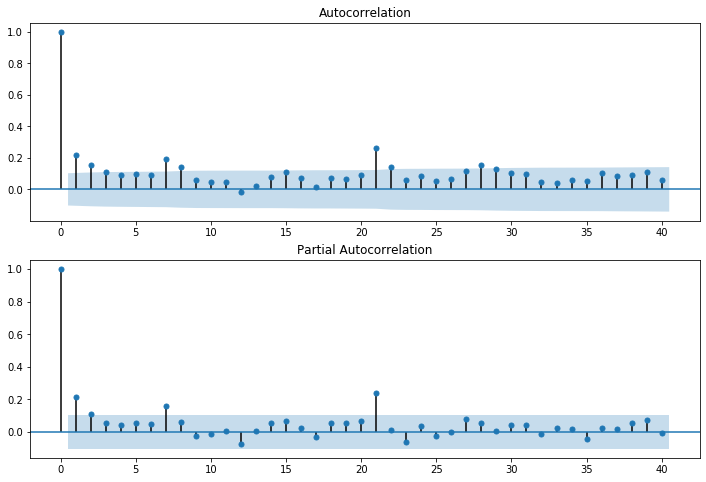

In [189]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)

In [190]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [191]:
training_data=df[0:320]
test_data=df[320:]

In [192]:
from statsmodels.tsa.arima_model import ARIMA

In [193]:
arima= ARIMA(training_data,order=(2,1,3))

C:\Users\varungo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\varungo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [194]:
model=arima.fit()

In [195]:
model.aic

2164.7000323808334